In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.4 MB/s 


In [3]:
import os
import numpy as np
import rasterio as rio
import math
from tensorflow import keras

In [4]:
filepath = 'gdrive/MyDrive/quick_output/'

In [5]:
# Load data
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
    directory=filepath,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(40, 40))


Found 9 files belonging to 3 classes.


In [6]:
# Explore data
for data, labels in train_ds.take(1):
    print(data.shape)
    print(labels.shape)

(9, 40, 40, 3)
(9, 3)


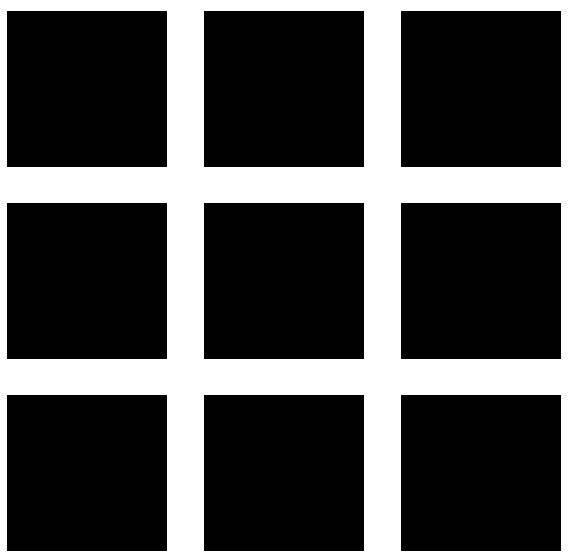

In [8]:
import matplotlib.pyplot as plt
 
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [10]:
import tensorflow as tf

img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
)

my_data = img_gen.flow_from_directory(filepath)
images, labels = next(my_data)

print(images.shape)
print(labels.shape)

Found 9 images belonging to 3 classes.
(9, 256, 256, 3)
(9, 3)


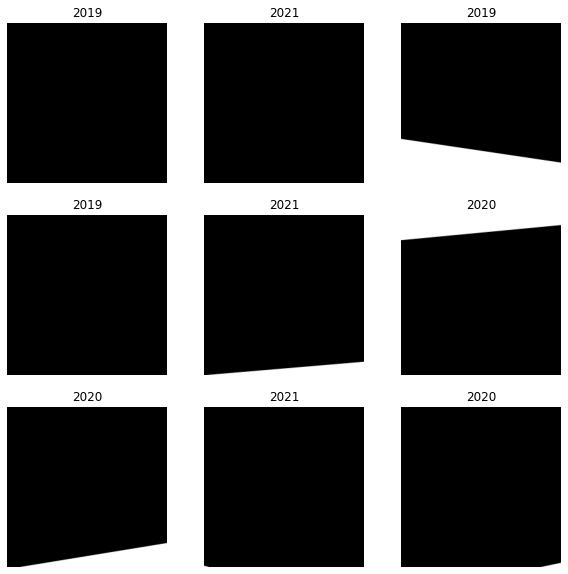

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    index = [index for index, each_item in enumerate(labels[i]) if each_item]
    plt.title(list(my_data.class_indices.keys())[index[0]])
    plt.axis("off")